# xPore: An AI-Powered App for Bioinformaticians

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

RAND_STATE = 123
np.random.seed(RAND_STATE)

In [ ]:
def viz(data, mu, sd):
  green = '#40909A'
  orange = '#C76C2B'
  alpha = 0.5
  plt.figure()

  data_min = min(min(data[0]),min(data[1]))
  data_max = max(max(data[0]),max(data[1]))

  x = np.linspace(data_min, data_max, 100)
  p = norm.pdf(x, mu[0], sd[0])
  plt.plot(x, p, linewidth = 2, color = green)

  x = np.linspace(data_min, data_max, 100)
  p = norm.pdf(x, mu[1], sd[1])
  plt.plot(x, p, linewidth = 2, color = green)

  _ = plt.hist(data[0], bins = 10, density = True, color = green, alpha = alpha)
  _ = plt.hist(data[1], bins = 10, density = True, color = green, alpha = alpha)

  plt.plot(data1, np.zeros(len(data[0])), linestyle='None', marker = 'o', markersize = 10, alpha = alpha, c = green)
  plt.plot(data2, np.zeros(len(data[1])), linestyle='None', marker = 'o', markersize = 10, alpha = alpha, c = orange)

  ax = plt.gca()
  ax.spines['top'].set_visible(False)
  ax.spines['right'].set_visible(False)

In [ ]:
mu = [1, 3]
sd = [.8, .5]
data1 = np.random.normal(mu[0], sd[0], size = 100)
data2 = np.random.normal(mu[1], sd[1], size = 50)

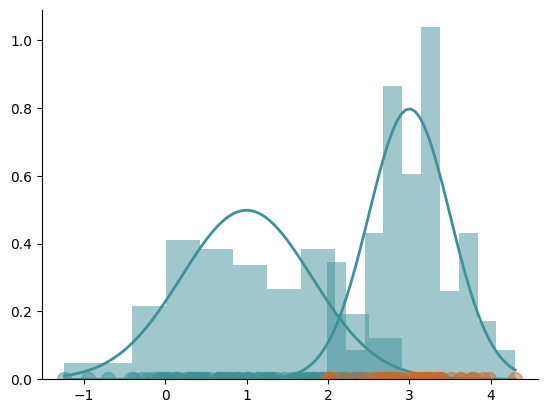

In [ ]:
viz([list(data1)] + [list(data2)], mu, sd)

In [ ]:
import seaborn as sns

In [ ]:
from sklearn.mixture import GaussianMixture
data = np.expand_dims(list(data1) + list(data2), axis = 1)

gmm = GaussianMixture(n_components = 2, init_params = 'random_from_data')
gmm.fit(data)

GaussianMixture(init_params='random_from_data', n_components=2)

In [ ]:
weights = gmm.weights_
means = gmm.means_.flatten()
std_devs = np.sqrt(gmm.covariances_).flatten()

GMM >>>
p(x) = 0.38Normal(0.41,0.58)+0.62Normal(2.48,0.82)


TypeError: viz() missing 1 required positional argument: 'sd'

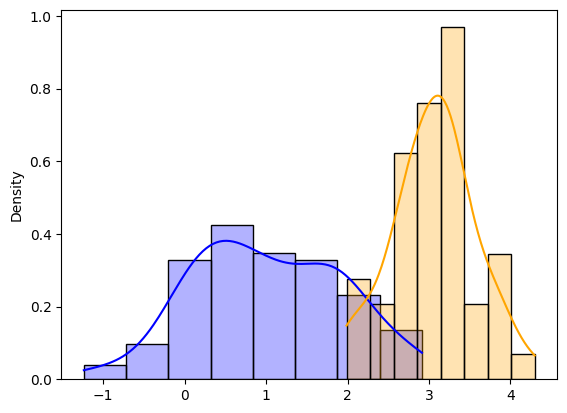

In [ ]:
print('GMM >>>')
w1, w2 = weights[0], weights[1]
mu1, mu2 = means[0], means[1]
sd1, sd2 = std_devs[0], std_devs[1]

print('p(x) = %.2fNormal(%.2f,%.2f)+%.2fNormal(%.2f,%.2f)' % (w1, mu1, sd1, w2, mu2, sd2))

sns.histplot(data1, kde=True, stat='density', color='blue', alpha=0.3)
sns.histplot(data2, kde=True, stat='density', color='orange', alpha=0.3)

viz([list(data1)] + [list(data2)],[[w1, mu1, sd1], [w2, mu2, sd2]])